# COMP3314 - Assignment 2

## Question 3: MNIST Visualizations (20 Points）

1. draw digits
2. pca before and after, draw digits
3. t-sne
4. 2-d pca

### Step 1: Download dataset
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). In this experiment, we'll only be using the test set.

In [1]:
import tensorflow as tf
import numpy as np

(xs_train, ys_train), (xs_test, ys_test) = tf.keras.datasets.mnist.load_data()

# We'll only be using the test set.
xs = xs_test.reshape((xs_test.shape[0], -1))
ys = ys_test

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")

11490434/11490434 [==============================] - 0s 0us/step
xs shape: (10000, 784)
ys shape: (10000,)


### Step 2: Visualize digits

Each hand-written MNIST digit is a 28x28 matrix. For each digit (0, 1, 2, ..., 9), pick one sample to visualize.

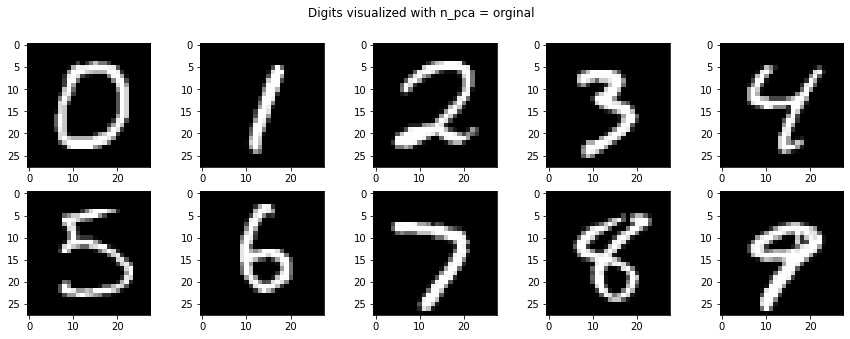

In [89]:
# === Your code here ===
import matplotlib.pyplot as plt
#num_i is the i-th version of corresponding number visualized, 0 <= ver <= 10
def visualizeDigit(xs, n_pca = 'orginal',ver = 0):
    if ver >= 10 or ver < 0:
        ver = 0
    
    fig, axs = plt.subplots(2,5, figsize = (15,5))
    for nr in range(2):
        for nc in range(5):
            num = nr * 5 + nc
            xs_target = np.where(ys == num)[0][ver]
            pixels = xs[xs_target]
            pixels = pixels.reshape((28,28))

            axs[nr,nc].imshow(pixels,cmap = 'gray')
    fig.suptitle('Digits visualized with n_pca = ' +str(n_pca))
    plt.show()

visualizeDigit(xs, ver = 1)
# ======================

### Step 3: PCA projection and recovery (5 Points)

The original dataset has 28x28=784 feature dimensions.

1. Use PCA to reduce the feature dimensions to [400, 200, 100, 50], respectively.
2. From the reduced dimension data, reproject the data back to 784 dimensions. Plot the results of the reprojected digits. For each PCA dimension, you should plot digits from 0-9, similar to step 2.

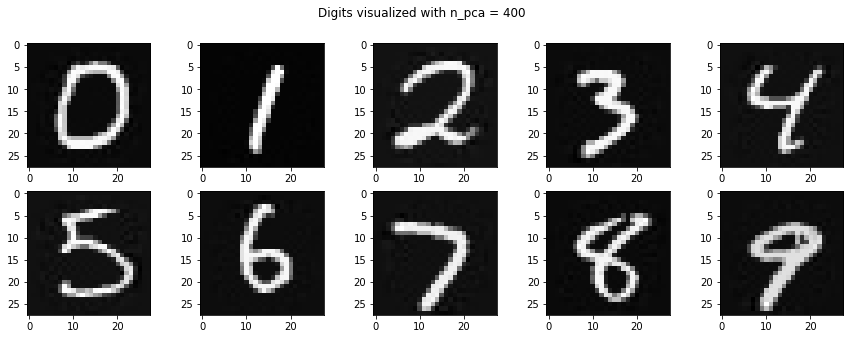

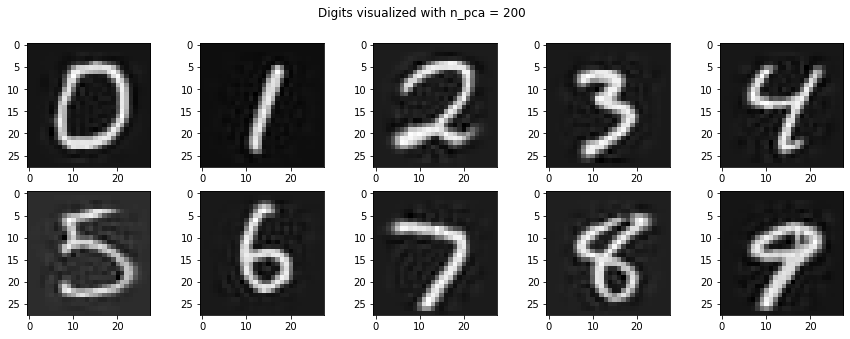

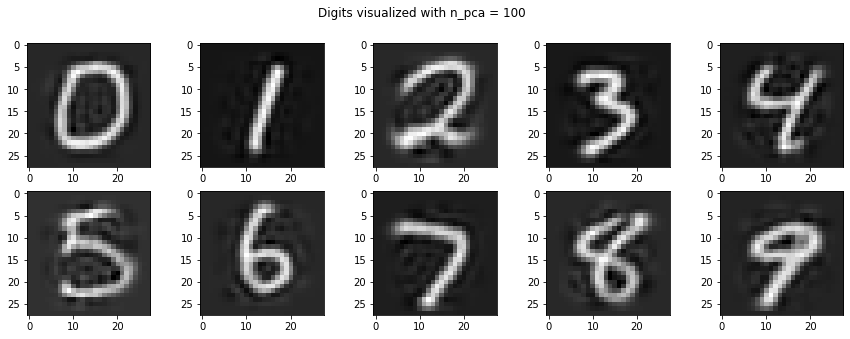

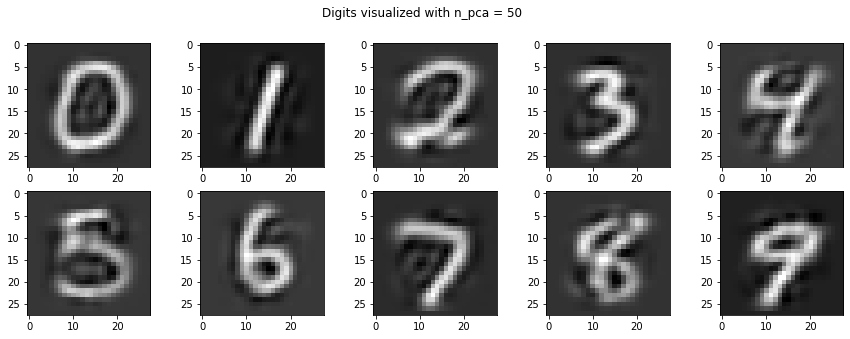

In [44]:
# === Your code here ===
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_tar = [400,200,100,50]
for pca_i in pca_tar:
    pca = PCA(n_components = pca_i)
    xs_reduced = pca.fit_transform(xs)
    xs_recovered = pca.inverse_transform(xs_reduced)
    visualizeDigit(xs_recovered,n_pca = pca_i, ver = 1)
# ======================

### Step 4: t-SNE visualization (5 Points)

Use t-SNE to reduce the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You should clearly see clusters of the digits from the visualization.

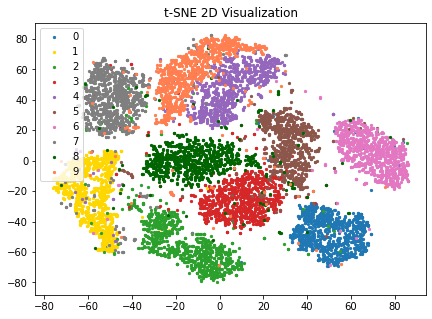

In [87]:
# === Your code here ===
from sklearn.manifold import TSNE
xs_tSNE = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(xs)

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def scatterPlot2D(xs,label):
    title = label+" 2D Visualization"
    colors = ['tab:blue', 'gold','tab:green','tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray','darkgreen','coral']
    
    plt.figure(figsize=(7,5))
    for num in range(0,10):
        plt.scatter(xs[ys == num,0],xs[ys == num,1], s = 5, c=colors[num], label = str(num))
    
    plt.legend()
    plt.title(title)
    plt.show()
scatterPlot2D(xs_tSNE, label = 't-SNE')
# ======================

### Step 5: PCA visualization (5 Points)

Next, let's use PCA to project the data to 2 dimension. Visualize the 2D data again. Which one performs better, t-SNE or PCA?

ANSWER: The two figures clearly demonstrate that t-SNE is better for data visualization.

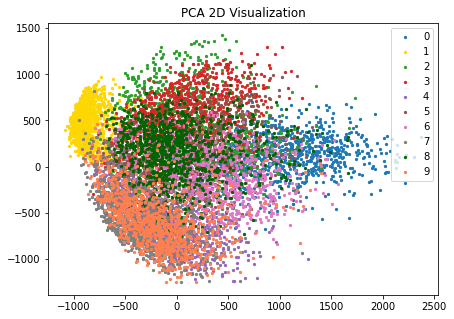

In [88]:
# === Your code here ===
pca = PCA(n_components = 2)
xs_pca = pca.fit_transform(xs)
scatterPlot2D(xs_pca, label = 'PCA')
# === Your code here ===